In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import pandas as pd
import numpy as np
np.random.seed(42)
angles = np.arange(60, 301, 1)
sine = np.sin(np.radians(angles))
noise = np.random.normal(0, 0.2, len(angles))
sine_curve = sine+noise
dataset = pd.DataFrame({'Angle': angles, 'Sine_Value': sine_curve})
dataset.to_csv('sine_curve_dataset.csv', index=False)

1.Perform Linear Regression on Dataset 1 and Dataset 2 by computing Cost function and gradient function from Scratch

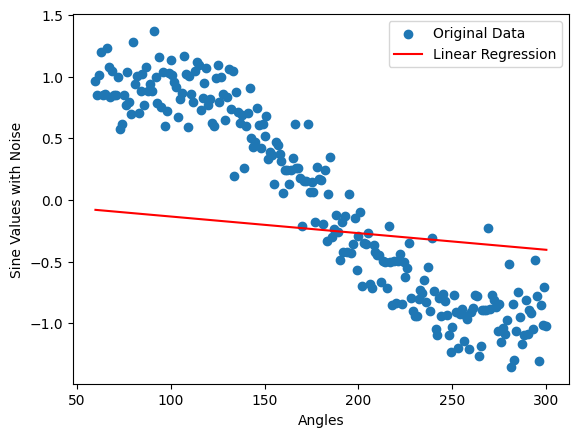

Final Parameters (theta): [ 1.82661636e-05 -1.35038377e-03]


In [ ]:
import matplotlib.pyplot as plt


# Linear Regression with Gradient Descent
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum(np.square(predictions - y))
    return cost

def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)

    for i in range(iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        theta = theta - (1/m) * learning_rate * (X.T.dot(errors))

    return theta

# Prepare data for linear regression
X = np.vstack((np.ones(len(angles)), angles)).T
y = sine_curve

# Initialize theta (parameters)
theta_initial = np.zeros(2)

# Set hyperparameters
learning_rate = 0.000000001
iterations = 100000

# Perform gradient descent
theta_final = gradient_descent(X, y, theta_initial, learning_rate, iterations)

# Plot the original data and the regression line
plt.scatter(angles, sine_curve, label='Original Data')
plt.plot(angles, X.dot(theta_final), color='red', label='Linear Regression')
plt.xlabel('Angles')
plt.ylabel('Sine Values with Noise')
plt.legend()
plt.show()

# Print the final parameters
print('Final Parameters (theta):', theta_final)

In [ ]:
df2 = pd.read_csv('/home/food_truck_data.txt')
df2.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


Text(0.5, 1.0, 'Population vs Profit')

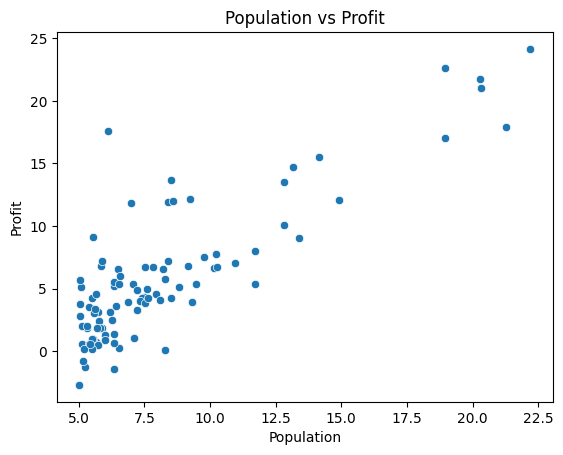

In [ ]:
import seaborn as sns
ax= sns.scatterplot(x= "Population" , y= "Profit" , data=df2)
ax.set_title("Population vs Profit")

In [ ]:
def cost_function(X,y,theta):
  m= len(y)
  y_pred= X.dot(theta)
  error= (y_pred - y) **2

  return 1/(2*m) * np.sum(error)

In [ ]:
m = df2.Population.size
X= np.append(np.ones((m,1)), df2.Population.values.reshape(m,1),axis=1)
y= df2.Profit.values.reshape(m,1)
theta= np.zeros((2,1))
cost_function(X,y,theta)

32.072733877455676

In [ ]:
def gradient_descent(X,y,theta,alpha,iterations):
  m= len(y)
  costs=[]

  for i in range(iterations):
    y_pred= X.dot(theta)
    error= np.dot(X.transpose(), (y_pred - y))

    theta -= alpha * 1/m * error
    costs.append(cost_function(X,y,theta))

    return theta,costs

In [ ]:
theta,costs = gradient_descent(X,y,theta,alpha= 0.01, iterations=10)
print("h(x)= {} + {}x1".format(str(round(theta[0,0],2)),str(round(theta[1,0],2))))

h(x)= 0.06 + 0.65x1


2. Use sklearn to perform linear regression on Dataset 2, show the scatter plot for best fit line using matplotliband show the results using MSE.

In [ ]:
from sklearn.model_selection import train_test_split
X = df2.drop('Profit',axis = 1)
X_train,X_test,y_train,y_test = train_test_split(X,df2['Profit'],test_size = 0.3,random_state = 42)

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train,y_train)
reg.score(X_test,y_test)

0.5905441260648103

In [ ]:
predictions = reg.predict(X)

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 9.064384699744403


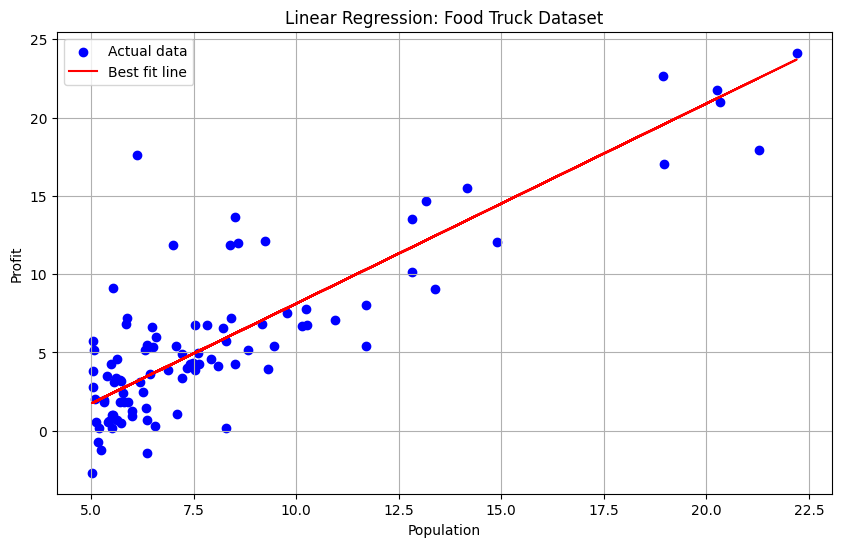

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X, predictions, color='red', label='Best fit line')
plt.xlabel('Population')
plt.ylabel('Profit')
plt.title('Linear Regression: Food Truck Dataset')
plt.legend()
plt.grid(True)
plt.show()

3. To perform regularization on linear model build using Linear Regression on Dataset3.

In [ ]:
df2 = pd.read_csv("/home/home_data.csv")

In [ ]:
df2.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df2.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
df2.nunique()

id               21436
date               372
price             4032
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

In [ ]:
df2.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
col_to_be_used = ['bedrooms','bathrooms','sqft_living']
df1 = df2[col_to_be_used]
df1.head()

,bedrooms,bathrooms,sqft_living
0,3,1.00,1180
1,3,2.25,2570
2,2,1.00,770
3,4,3.00,1960
4,3,2.00,1680


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df1,df2['price'],test_size = 0.3,random_state = 42)

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train,y_train)
reg.score(X_test,y_test)


0.4978201421834113

In [ ]:
reg.score(X_test,y_test)

0.4978201421834113

In [ ]:
from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha = 50,max_iter = 100,tol = 0.1)
lasso_reg.fit(X_train,y_train)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [ ]:
lasso_reg.score(X_test,y_test)

0.49781742392500006

In [ ]:
lasso_reg.score(X_train,y_train)

0.5111174542409918

In [ ]:
train_predictions = lasso_reg.predict(X_train)
test_predictions = lasso_reg.predict(X_test)
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)
print("Train Mean Squared Error:", train_mse)
print("Test Mean Squared Error:", test_mse)

Train Mean Squared Error: 63870504261.08206
Test Mean Squared Error: 72498357950.06429


In [ ]:
ridge_reg = linear_model.Ridge(alpha = 50,max_iter = 100,tol = 0.1)
ridge_reg.fit(X_train,y_train)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [ ]:
ridge_reg.score(X_test,y_test)

0.49781207108257

In [ ]:
ridge_reg.score(X_train,y_train)

0.5111169913547382

In [ ]:
train_predictions = ridge_reg.predict(X_train)
test_predictions = ridge_reg.predict(X_test)
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)
print("Train Mean Squared Error:", train_mse)
print("Test Mean Squared Error:", test_mse)

Train Mean Squared Error: 63870564735.277115
Test Mean Squared Error: 72499130721.37305
